In [ ]:
import requests
import base64
from PIL import Image
import numpy as np
from io import BytesIO
import cv2

In [59]:
import requests

url = "http://localhost:8000/trend-geo/stores"
headers = {
    "Content-Type": "application/json"
}
data = {
    "product_metadata": {
        "material_info": "Wool blend",
        "description": "A sleek, modern black blazer perfect for formal and semi-formal occasions."
    },
    "user_style_description": "I am looking for a modern, elegant, and versatile blazer for business meetings.",
    "user_location": "San Francisco, CA"
}

response = requests.post(url, headers=headers, json=data)

print("Status Code:", response.status_code)
print("Response JSON:", response.json())


Status Code: 200
Response JSON: {'stores': [{'name': 'Custom Sport Coats and Blazers', 'address': 'San Francisco', 'latitude': 37.7749295, 'longitude': -122.4194155}, {'name': 'Paramount Oversized Blazer', 'address': 'San Francisco', 'latitude': 37.7749295, 'longitude': -122.4194155}, {'name': 'Suit Store San Francisco', 'address': 'San Francisco', 'latitude': 37.7749295, 'longitude': -122.4194155}, {'name': 'SUITSUPPLY United Kingdom', 'address': 'San Francisco', 'latitude': 37.7749295, 'longitude': -122.4194155}, {'name': 'TOP 10 BEST Mens Blazers', 'address': 'San Francisco', 'latitude': 37.7749295, 'longitude': -122.4194155}, {'name': 'NB TAILORING AND ALTERATIONS', 'address': 'San Francisco', 'latitude': 37.7749295, 'longitude': -122.4194155}]}


In [ ]:
user_query = """
Hi, I’m looking for help finding my perfect style match. 
I uploaded a photo of myself wearing an outfit I really like—it's casual, soft, and feels very 'me'. 
I want to explore products that have a similar overall visual aesthetic and are made of similar fabrics.
What I want and look for the casual, sleek, and elegant, and perfect for outdoor activities. 
I want a cozy fabric that can endure heat so that I can have much activities. 
Can you analyze this outfit and recommend fashion items with similar color palette, texture, and vibe? Ideally, I'd love suggestions for tops, jeans, or even shoes that match this style. Thank you!"""

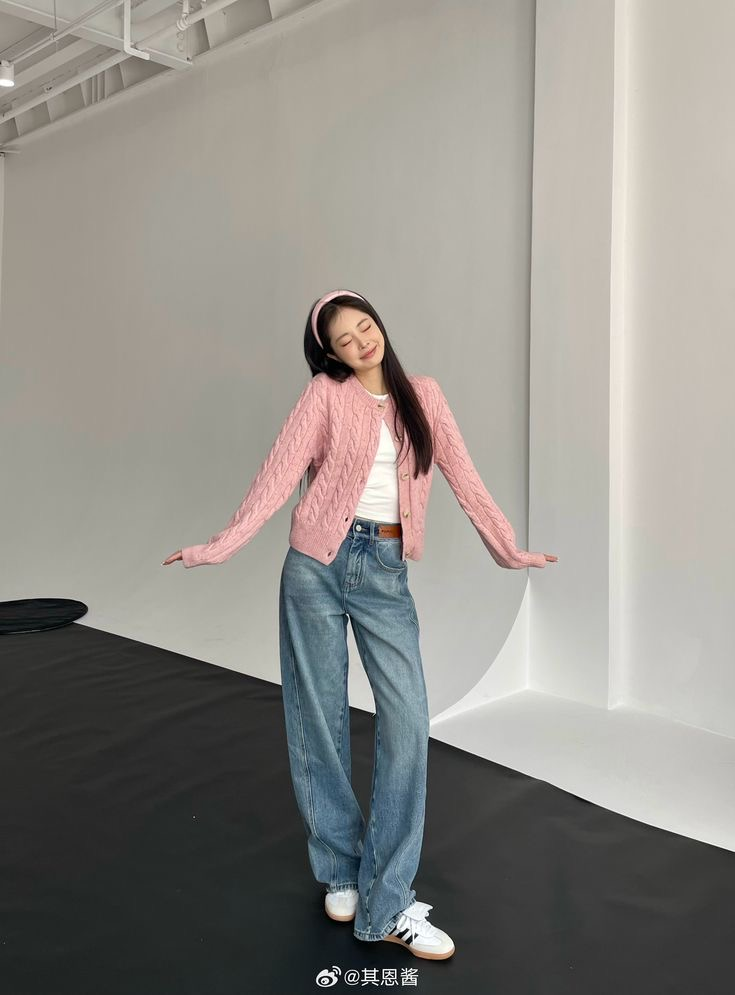

In [ ]:
image_query = Image.open("2. Pinky.JPG").convert("RGB")
image_query

In [11]:
image_path = "2. Pinky.JPG"
with open(image_path, "rb") as image_file:
    image_bytes = image_file.read()
    image_query_base64  = base64.b64encode(image_bytes).decode("utf-8")
image_query_base64

'/9j/4AAQSkZJRgABAQAASABIAAD/4Rn5RXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAMAAAABIAAAAAQAAAEgAAAABAAeQAAAHAAAABDAyMjGRAQAHAAAABAECAwCgAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAAt+gAwAEAAAAAQAAA+OkBgADAAAAAQAAAAAAAAAAAAYBAwADAAAAAQAGAAABGgAFAAAAAQAAAQ4BGwAFAAAAAQAAARYBKAADAAAAAQACAAACAQAEAAAAAQAAAR4CAgAEAAAAAQAAGNEAAAAAAAAASAAAAAEAAABIAAAAAf/Y/9sAhAABAQEBAQECAQECAwICAgMEAwMDAwQFBAQEBAQFBgUFBQUFBQYGBgYGBgYGBwcHBwcHCAgICAgJCQkJCQkJCQkJAQEBAQICAgQCAgQJBgUGCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQn/3QAEAAj/wAARCACgAHYDASIAAhEBAxEB/8QBogAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoLEAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGRoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T19vf4+foBAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKCxEAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQd

# Ask Visual Matching - RAP MLLM

In [24]:
def full_fashion_advisor(image_query_base64, user_query):
    # Object Detection
    payload = {
        "image_base64": image_query_base64
    }
    response_object_detector = requests.post("http://127.0.0.1:8000/ai/object-detector", json=payload)
    detection_item = response_object_detector.json()
    # Image-to-image Retrieval
    payload = {
        "image_base64": image_query_base64,
        "items":detection_item
    }
    k=3
    response_image_retrieval= requests.post(f"http://127.0.0.1:8000/ai/image-retrieval?k={k}", json=payload)
    retrieval_output = response_image_retrieval.json()
    # Fashion Analysis
    payload = {
        "image": {"image_base64": image_query_base64},
        "data": retrieval_output
    }
    params = {"user_query": user_query}
    response = requests.post(
        "http://127.0.0.1:8000/ai/response-generation-fasion-advisor",
        params=params,
        json=payload
    )
    
    return response.json()


In [32]:
# SIMPLIFIED VERSION (RECOMMENDED, You can Just Using This

payload = {
    "image_base64": image_query_base64,
    "user_query": user_query
}
response = requests.post("http://127.0.0.1:8000/ai/fashion-advisor-visual",json=payload)
print(response.json())


{'response': "## **Outfit Analysis and Recommendations**\n\n### **What Works Well in Your Outfit**  \nYour outfit features a **soft, feminine aesthetic** with a **pastel pink cable knit cardigan**, a **white top**, **light blue jeans**, and **white sneakers**. The overall look is **casual yet stylish**, fitting into the **soft casual** or **casual chic** fashion category.  \n\n- **Color Coordination**: The pastel pink cardigan pairs nicely with the neutral white top and light blue jeans, creating a harmonious and soothing color palette.  \n- **Silhouette**: The **loose-fitting cardigan** and **wide-leg jeans** create a relaxed, comfortable silhouette.  \n- **Layering**: The cardigan adds a nice layering element, enhancing the outfit's depth.  \n- **Accessories**: The **headband** adds a subtle touch without overpowering the look.  \n- **Fabric Choice**: TheThe **02<|header_start|> \n\n### ** of the reference images provided to### What **specific products or styles** could user consider

In [28]:
print(response.json()["response"])

**Outfit Analysis**

The user's outfit consists of a pink cable-knit cardigan, a white top, light blue jeans, and white sneakers. 

### What Works Well

* The soft, pastel pink color of the cardigan complements the user's skin tone and adds a touch of femininity to the outfit.
* The cable-knit fabric of the cardigan adds texture and visual interest.
* The light blue jeans and white sneakers create a clean and casual base that lets the cardigan be the focal point.
* The overall look is cohesive and harmonious, with a mix of soft colors and casual fabrics.

### What Could Be Improved

* The outfit could benefit from a statement accessory, such as a necklace or earrings, to add some visual interest to the overall look.
* The white top underneath the cardigan is a bit plain and could be swapped out for a more interesting texture or pattern.

### Fashion Style or Category

The user's outfit falls under the category of **Casual Chic** or **Soft Grunge**, characterized by a mix of comfortable

# Ask ONLINE AGENT

In [60]:
# SIMPLIFIED VERSION (RECOMMENDED, You can Just Using This

payload = {
    "user_query": user_query
}
response = requests.post("http://127.0.0.1:8000/ai/online-search-agent",json=payload)
print(response.json())


{'response': {'stores': [{'name': 'Isalis', 'address': 'San Francisco, CA', 'latitude': 37.7749295, 'longitude': -122.4194155}, {'name': 'Britex Fabrics', 'address': 'San Francisco, CA', 'latitude': 37.7887084, 'longitude': -122.4040869}, {'name': 'M A C MODERN APPEALING CLOTHING', 'address': 'San Francisco, CA', 'latitude': 37.80125659999999, 'longitude': -122.4078117}]}}


# SUMMARIZE FINAL OUTPUT